In [1]:
from sklearn import tree
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Path to training and testing data
path_to_data = "/content/drive/MyDrive/Colab Notebooks/Datasets/Phishing_Datasets/dataset.csv"

In [4]:
#Specifying relevant columns
data_columns = ['having_ip', 'URL_len', 'Shortening_Service', 'having_At_symbol', 'double_slash_redirecting', 'prefix_suffix', 'having_sub_Domain', 'SSL_final_State','Domain_Registeration_Len' , 'Favicon', 'Port', 'HTTPS_Token', 'Request_URL', 'URL_of_Anchor', 'Links_in_Tags', 'SFH', 'Submitting_To_Emial', 'Abnormal_URL', 'Redirect', 'On_Mouseover', 'RightClick', 'Pop_Up_Window', 'Iframe', 'Age_of_Domain', 'DNS_Record', 'Web_Traffic', 'Page_Rank', 'Google_Index', 'Links_Pointing_to_Page', 'Statistical_Report','Labels']

In [5]:
#Reading relevant columns
dataset = pd.read_csv(path_to_data, names = data_columns)

In [6]:
#Overview of first 5 views from training & testing dataset.
dataset.head()

,having_ip,URL_len,Shortening_Service,having_At_symbol,double_slash_redirecting,prefix_suffix,having_sub_Domain,SSL_final_State,Domain_Registeration_Len,Favicon,...,Pop_Up_Window,Iframe,Age_of_Domain,DNS_Record,Web_Traffic,Page_Rank,Google_Index,Links_Pointing_to_Page,Statistical_Report,Labels
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [7]:
#Exploring dataset to check quality.
dataset.shape
#11055 rows, 31 columns

(11055, 31)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   having_ip                 11055 non-null  int64
 1   URL_len                   11055 non-null  int64
 2   Shortening_Service        11055 non-null  int64
 3   having_At_symbol          11055 non-null  int64
 4   double_slash_redirecting  11055 non-null  int64
 5   prefix_suffix             11055 non-null  int64
 6   having_sub_Domain         11055 non-null  int64
 7   SSL_final_State           11055 non-null  int64
 8   Domain_Registeration_Len  11055 non-null  int64
 9   Favicon                   11055 non-null  int64
 10  Port                      11055 non-null  int64
 11  HTTPS_Token               11055 non-null  int64
 12  Request_URL               11055 non-null  int64
 13  URL_of_Anchor             11055 non-null  int64
 14  Links_in_Tags             11055 non-nu

In [9]:
#Statistics per column
dataset.describe()

,having_ip,URL_len,Shortening_Service,having_At_symbol,double_slash_redirecting,prefix_suffix,having_sub_Domain,SSL_final_State,Domain_Registeration_Len,Favicon,...,Pop_Up_Window,Iframe,Age_of_Domain,DNS_Record,Web_Traffic,Page_Rank,Google_Index,Links_Pointing_to_Page,Statistical_Report,Labels
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
#Unique attack labels. I.e - Which labels signify phishing website
dataset['Labels'].unique()

array([-1,  1])

-1 indicates a regular website, while 1 indicates a phishing website.


In [11]:
#No. of instances associated with a particular user
dataset['Labels'].value_counts()

,count
Labels,
1,6157
-1,4898


In [12]:
#Separating Features and Columns
features = dataset.drop('Labels', axis=1)
Labels = dataset['Labels']

Labels indicate the outcome of a model. In our case, -1 or 1 to determine a phishing website.

Features are the parameters that help determine the Labels/outcome.


In [13]:
features.shape

(11055, 30)

In [14]:
Labels.shape

(11055,)

Extracting Features to create a training and testing dataset.



In [15]:
#Training set using the first 2000 websites from the dataset.
X_train = features[:2000]
Y_train = Labels[:2000]

In [16]:
#Testing dataset using the remaining 2000 websites
X_test = features[2000:]
Y_test = Labels[2000:]

In [17]:
X_train.shape

(2000, 30)

In [18]:
Y_train.shape

(2000,)

In [19]:
X_test.shape

(9055, 30)

In [20]:
Y_test.shape

(9055,)

Decision Tree Classifier model training

In [21]:
Attack_detection_model = tree.DecisionTreeClassifier()

In [22]:
Attack_detection_model.fit(X_train, Y_train)

DecisionTreeClassifier()

Cross Validation

In [23]:
from sklearn.model_selection import cross_validate

In [24]:
scores = cross_validate(Attack_detection_model, X_train, Y_train, cv=10, return_train_score=False)
print(scores)

{'fit_time': array([0.01200819, 0.0086987 , 0.00709391, 0.00710082, 0.00730062,
       0.00698781, 0.00817919, 0.01255798, 0.00961423, 0.01052308]), 'score_time': array([0.00367284, 0.00309205, 0.00304294, 0.00354981, 0.00299096,
       0.00297928, 0.00375342, 0.00462461, 0.0043273 , 0.00460386]), 'test_score': array([0.965, 0.945, 0.965, 0.975, 0.92 , 0.94 , 0.955, 0.945, 0.97 ,
       0.96 ])}


Plotting decision tree

In [25]:
import graphviz
dot_data = tree.export_graphviz(Attack_detection_model, out_file=None, feature_names=X_train.columns, filled=True)


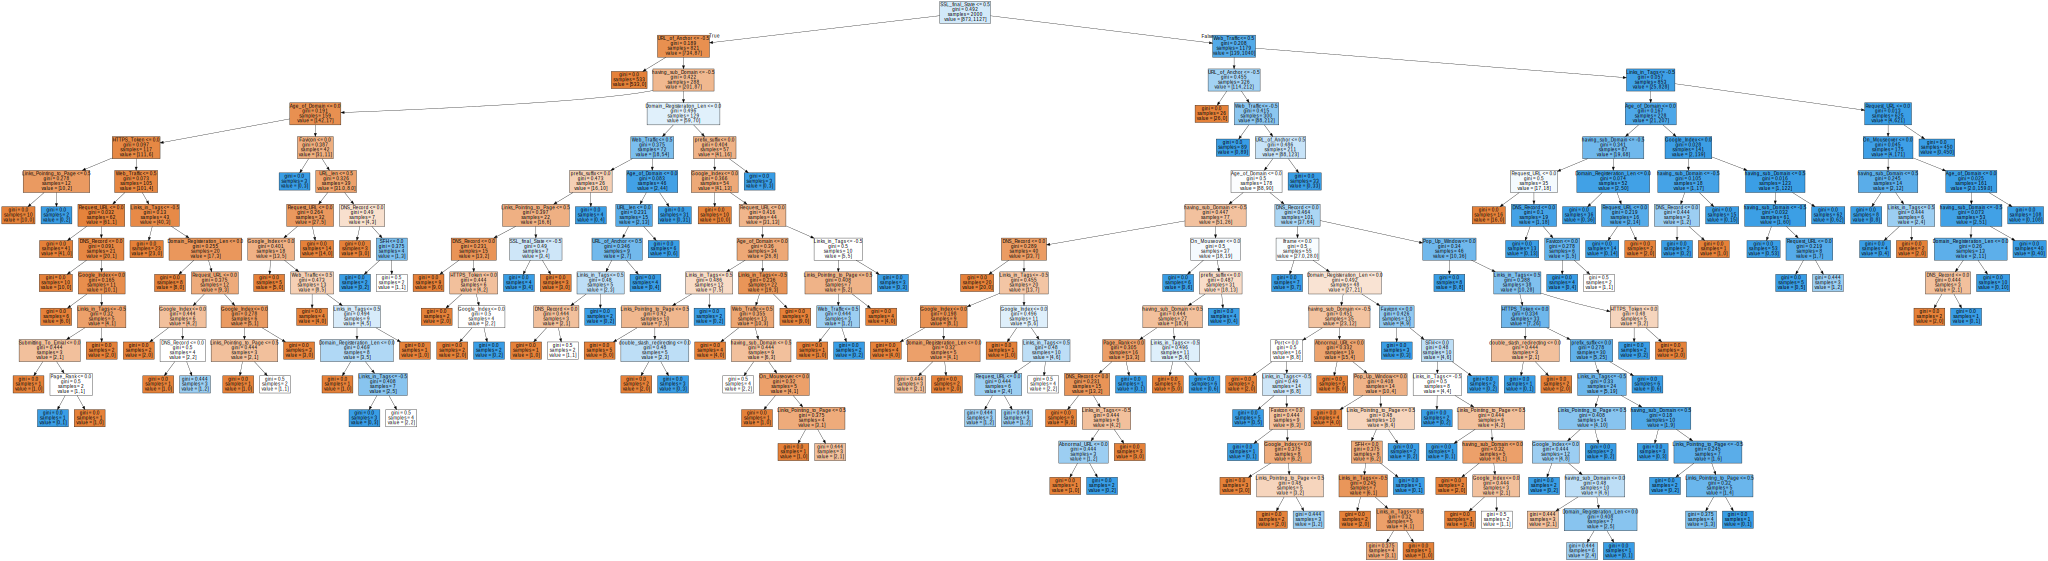

In [26]:
graph = graphviz.Source(dot_data, format="png")
graph

Evaluating model

In [28]:
# Use the trained classifier to make predictions on the test data
predictions = Attack_detection_model.predict(X_test)
print(predictions)
print("Predictions on testing data computed.")

[-1 -1  1 ...  1 -1 -1]
Predictions on testing data computed.


In [29]:
 # Print the accuracy (percentage of phishing websites correctly predicted)
accuracy = 100.0 * accuracy_score(Y_test, predictions)
print("The accuracy of your decision tree on testing data is: " + str(accuracy))

The accuracy of your decision tree on testing data is: 90.64605190502485


In [30]:
from sklearn.metrics import confusion_matrix, classification_report #
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[3441  584]
 [ 263 4767]]
              precision    recall  f1-score   support

          -1       0.93      0.85      0.89      4025
           1       0.89      0.95      0.92      5030

    accuracy                           0.91      9055
   macro avg       0.91      0.90      0.90      9055
weighted avg       0.91      0.91      0.91      9055

